In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from my_models.optimizer import Optimizer # Кастомный класс оптимизатора
from my_models.normolization import min_max_scaller # Кастоммный класс нормализации

In [3]:
df = pd.read_csv('5.dat', sep='\t')
df

,Tsys,Out1,Ou2,In1,In2,In3,In4,In5,In6
0,2362.42077,7.66364,1.68724,-90.0,5099.35795,4.46604,0.000356,0.001120,0.001120
1,5962.07691,8.39095,1.68731,-90.0,5100.97968,8.07564,0.000427,0.000405,0.000405
2,9561.85409,8.67365,1.68735,-90.0,5102.47173,11.21727,0.000404,-0.000035,-0.000035
3,13161.83265,8.46233,1.68744,-90.0,5103.83133,14.14074,0.000367,0.000555,0.000555
4,16761.45287,9.25582,1.68747,-90.0,5105.14095,17.00533,0.000353,0.001050,0.001050
...,...,...,...,...,...,...,...,...,...
1001,34760.94292,8.52628,1.68773,90.0,5111.62272,31.27375,0.000382,0.000542,0.000542
1002,38360.94078,8.05349,1.68784,90.0,5112.89864,34.08435,0.000358,0.000747,0.000747
1003,41960.78591,7.93733,1.68788,90.0,5114.16861,36.90738,0.000349,0.000990,0.000990
1004,45560.60909,7.94716,1.68786,90.0,5115.43246,39.71580,0.000342,0.001210,0.001210


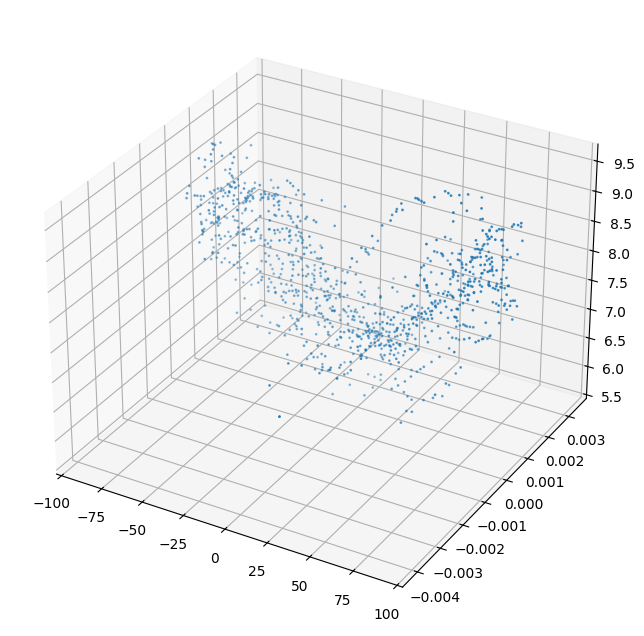

In [4]:
X, Y = np.meshgrid(df['In1'].iloc[:1000], df['In2'].iloc[:1000])


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['In1'], df['In6'], df['Out1'], s=1)

plt.show()

In [5]:
X = df[['In1', 'In2']].values
y = df['Out1'].values
y = y.reshape(-1, 1)

minMaxScaller = min_max_scaller()
minMaxScaller.fit(X)
X_norm = minMaxScaller.transform(X)
X_norm

array([[0.        , 0.01936935],
       [0.        , 0.10865578],
       [0.        , 0.19080252],
       ...,
       [1.        , 0.8347893 ],
       [1.        , 0.90437218],
       [1.        , 0.97309344]], shape=(1006, 2))

In [6]:
import importlib
import my_models.NeuronNetwork

importlib.reload(my_models.NeuronNetwork)
from my_models.NeuronNetwork import NeuronNetwork

In [8]:
nn = NeuronNetwork(layers=((10, 'ReLU'),
                           (15, 'ReLU'),
                           (5, 'ReLU'),
                           (1, 'lianer')),
                   loss_func='mse')

nn.fit(X_norm, y, size_batch=10, learning_rate=10**(-4), eps=10**(-8), optimizer='Adam', alpha=0.9, count_epoch=5, count_of_iteration=25000)

Эпоха 1 обучена | LogLoss: [[0.33859772]]
Эпоха 2 обучена | LogLoss: [[0.45144381]]
Эпоха 3 обучена | LogLoss: [[0.28205351]]
Эпоха 4 обучена | LogLoss: [[0.36145075]]
Эпоха 5 обучена | LogLoss: [[0.43145905]]


In [23]:
nn._dct_of_models

{<my_models._NeuronNetwork._NeuronNetwork at 0x293f46cc390>: array([[0.18080373]]),
 <my_models._NeuronNetwork._NeuronNetwork at 0x293f56bf110>: array([[0.48806968]])}

In [26]:
import importlib
import my_models._NeuronNetwork

importlib.reload(my_models._NeuronNetwork)
from my_models._NeuronNetwork import _NeuronNetwork